# Benchmarks

In [1]:
import cveig
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
from scipy.stats import powerlaw, pareto, genpareto

## Stochastic Block model

In [2]:
k = 10
B = cveig.simple_block_connectivity_matrix(k, 0.28, 0.08)
z = np.repeat(list(range(k)), 20)
expected_degrees = np.arange(25, 61, 5)
#point_results = {'non_backtracking':[], 'bethe_hessian' : [], 'cv_eig' : []}
#power_results = {'non_backtracking':[], 'bethe_hessian' : [], 'cv_eig' : []}
#pareto_results = {'non_backtracking':[], 'bethe_hessian' : [], 'cv_eig' : []}
#results = [point_results, power_results, pareto_results]

In [3]:
n_tries = 10

total_results = []
for degree in expected_degrees:
    results = np.zeros((3,4))
    for i in range(n_tries):
        
        theta_power = powerlaw.rvs(5, size=len(z))
        theta_power = theta_power / np.sum(theta_power)
        theta_point = np.full((len(z)), 1)
        theta_pareto = genpareto.rvs(0.2, scale=0.4, size=len(z))
        theta_pareto = theta_pareto / np.sum(theta_pareto)
        
        thetas = [theta_point, theta_power, theta_pareto]
        
        for i, theta in enumerate(thetas):

            try:
                adj_matrix = cveig.dc_sbm(theta, z, B, expected_degree=degree)
            except:
                continue
                
            adj_matrix = sparse.csr_array(adj_matrix)
            results[i, 0] += np.abs(cveig.non_backtracking(adj_matrix, 15) - k)
            results[i, 1] += np.abs(cveig.bethe_hessian(adj_matrix) - k)
            results[i, 2] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.5) - k)
            results[i, 3] += np.abs(cveig.eig_cv_mod(adj_matrix, 15, 0.5) - k)
            
    results /= n_tries
    total_results.append(results)

Eigs did not converge. Computed 9 eigenvectors
Eigs did not converge. Computed 14 eigenvectors
Eigs did not converge. Computed 10 eigenvectors
Eigs did not converge. Computed 14 eigenvectors


In [4]:
point_non_bt = [i[0,0] for i in total_results]
point_bh = [i[0,1] for i in total_results]
point_cveig = [i[0,2] for i in total_results]
point_cveig_alt = [i[0,3] for i in total_results]
power_non_bt = [i[1,0] for i in total_results]
power_bh = [i[1,1] for i in total_results]
power_cveig = [i[1,2] for i in total_results]
power_cveig_alt = [i[0,3] for i in total_results]
pareto_non_bt = [i[2,0] for i in total_results]
pareto_bh = [i[2,1] for i in total_results]
pareto_cveig = [i[2,2] for i in total_results]
pareto_cveig_mod = [i[0,3] for i in total_results]

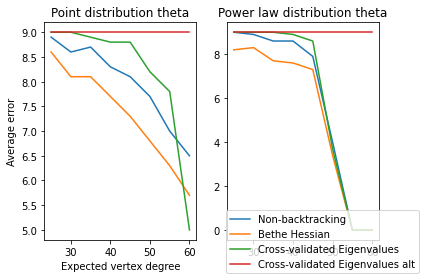

In [5]:
fig, ax = plt.subplots(1,2)
ax[0].plot(expected_degrees, point_non_bt, label='Non-backtracking')
ax[0].plot(expected_degrees, point_bh, label='Bethe Hessian')
ax[0].plot(expected_degrees, point_cveig, label='Cross-validated Eigenvalues')
ax[0].plot(expected_degrees, point_cveig_alt, label='Cross-validated Eigenvalues alt')
ax[0].set_title('Point distribution theta')
ax[0].set_ylabel('Average error')

ax[1].plot(expected_degrees, power_non_bt, label='Non-backtracking')
ax[1].plot(expected_degrees, power_bh, label='Bethe Hessian')
ax[1].plot(expected_degrees, power_cveig, label='Cross-validated Eigenvalues')
ax[1].plot(expected_degrees, power_cveig_alt, label='Cross-validated Eigenvalues alt')
ax[1].set_title('Power law distribution theta')

#ax[2].plot(expected_degrees, pareto_non_bt, label='Non-backtracking')
#ax[2].plot(expected_degrees, pareto_bh, label='Bethe Hessian')
#ax[2].plot(expected_degrees, pareto_cveig, label='Cross-validated Eigenvalues')
ax[0].set_xlabel('Expected vertex degree')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')
fig.savefig('testx.png')

In [6]:
n_tries = 10

total_results_cveig = []
for degree in expected_degrees:
    results = np.zeros((3,3))
    for i in range(n_tries):
        
        theta_power = powerlaw.rvs(5, size=len(z))
        theta_power = theta_power / np.sum(theta_power)
        theta_point = np.full((len(z)), 1)
        theta_pareto = genpareto.rvs(0.2, scale=0.4, size=len(z))
        theta_pareto = theta_pareto / np.sum(theta_pareto)
        
        thetas = [theta_point, theta_power, theta_pareto]
        
        for i, theta in enumerate(thetas):

            try:
                adj_matrix = cveig.dc_sbm(theta, z, B, expected_degree=degree)
            except:
                continue
                
            adj_matrix = sparse.csr_array(adj_matrix)
            results[i, 0] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.2) - k)
            results[i, 1] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.5) - k)
            results[i, 2] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.8) - k)
            
    results /= n_tries
    total_results_cveig.append(results)

In [7]:
point_02 = [i[0,0] for i in total_results_cveig]
point_05 = [i[0,1] for i in total_results_cveig]
point_08 = [i[0,2] for i in total_results_cveig]
power_02 = [i[1,0] for i in total_results_cveig]
power_05 = [i[1,1] for i in total_results_cveig]
power_08 = [i[1,2] for i in total_results_cveig]
pareto_02 = [i[2,0] for i in total_results_cveig]
pareto_05 = [i[2,1] for i in total_results_cveig]
pareto_08 = [i[2,2] for i in total_results_cveig]

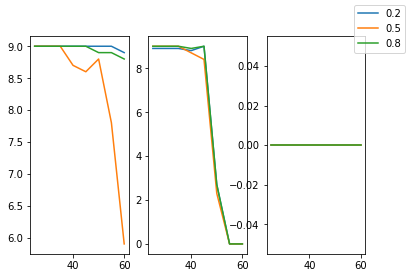

In [8]:
fig, ax = plt.subplots(1,3)
ax[0].plot(expected_degrees, point_02, label='0.2')
ax[0].plot(expected_degrees, point_05, label='0.5')
ax[0].plot(expected_degrees, point_08, label='0.8')

ax[1].plot(expected_degrees, power_02, label='0.2')
ax[1].plot(expected_degrees, power_05, label='0.5')
ax[1].plot(expected_degrees, power_08, label='0.8')

ax[2].plot(expected_degrees, pareto_02, label='0.2')
ax[2].plot(expected_degrees, pareto_05, label='0.5')
ax[2].plot(expected_degrees, pareto_08, label='0.8')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

In [9]:
n_tries = 10

total_results_cveig2 = []
for degree in expected_degrees:
    results = np.zeros((3,3))
    for i in range(n_tries):
        
        theta_power = powerlaw.rvs(5, size=len(z))
        theta_power = theta_power / np.sum(theta_power)
        theta_point = np.full((len(z)), 1)
        theta_pareto = genpareto.rvs(0.2, scale=0.4, size=len(z))
        theta_pareto = theta_pareto / np.sum(theta_pareto)
        
        thetas = [theta_point, theta_power, theta_pareto]
        
        for i, theta in enumerate(thetas):

            try:
                adj_matrix = cveig.dc_sbm(theta, z, B, expected_degree=degree)
            except:
                results[i, 0] = np.nan
                results[i, 1] = np.nan
                results[i, 2] = np.nan
                
            adj_matrix = sparse.csr_array(adj_matrix)
            results[i, 0] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.45) - k)
            results[i, 1] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.5) - k)
            results[i, 2] += np.abs(cveig.eig_cv(adj_matrix, 15, 0.55) - k)
            
    results /= n_tries
    total_results_cveig2.append(results)

KeyboardInterrupt: 

In [ ]:
point_045 = [i[0,0] for i in total_results_cveig2]
point_05 = [i[0,1] for i in total_results_cveig2]
point_055 = [i[0,2] for i in total_results_cveig2]
power_045 = [i[1,0] for i in total_results_cveig2]
power_05 = [i[1,1] for i in total_results_cveig2]
power_055 = [i[1,2] for i in total_results_cveig2]
pareto_045 = [i[2,0] for i in total_results_cveig2]
pareto_05 = [i[2,1] for i in total_results_cveig2]
pareto_055 = [i[2,2] for i in total_results_cveig2]

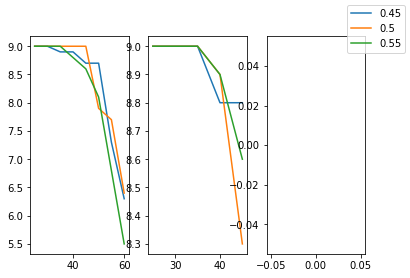

In [ ]:
fig, ax = plt.subplots(1,3)
ax[0].plot(expected_degrees, point_045, label='0.45')
ax[0].plot(expected_degrees, point_05, label='0.5')
ax[0].plot(expected_degrees, point_055, label='0.55')

ax[1].plot(expected_degrees, power_045, label='0.45')
ax[1].plot(expected_degrees, power_05, label='0.5')
ax[1].plot(expected_degrees, power_055, label='0.55')

ax[2].plot(expected_degrees, pareto_045, label='0.45')
ax[2].plot(expected_degrees, pareto_05, label='0.5')
ax[2].plot(expected_degrees, pareto_055, label='0.55')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

In [ ]:
theta_pareto = genpareto.rvs(0.2, scale=0.4, size=len(z))

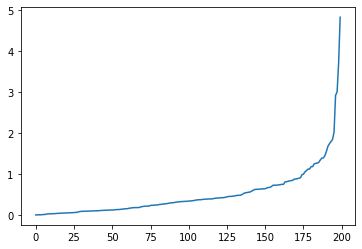

In [ ]:
plt.plot(sorted(theta_pareto))